'''
<br><br>
@Author: Shivraj Yelave<br>
@Date: 3-10-24<br>
@Last modified by: Shivraj Yelave<br>
@Last modified time: <br>
@Title: KNN to Predict Salary is above 50 k or not<br>
<br>
'''


### Import Libraries

In [86]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [93]:
# Load the dataset
url = 'https://drive.google.com/uc?id=1XVi34snXnh6qW2u71jwc05oCRnpOXoWF'
df = pd.read_csv(url, header=None, na_values=' ?', 
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                        'hours-per-week', 'native-country', 'income'])

# Display the first few rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Analyzing dataset

In [94]:
print(df.describe())
print(df.info())
print(df.isnull().sum())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries

### Handling null values

In [95]:
# Handling missing values (drop rows with NaN values)
df.dropna(inplace=True)
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

### Handling Dataset

In [96]:
# Encoding categorical variables
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                       'race', 'sex', 'native-country', 'income']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


### Checking Outliers

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


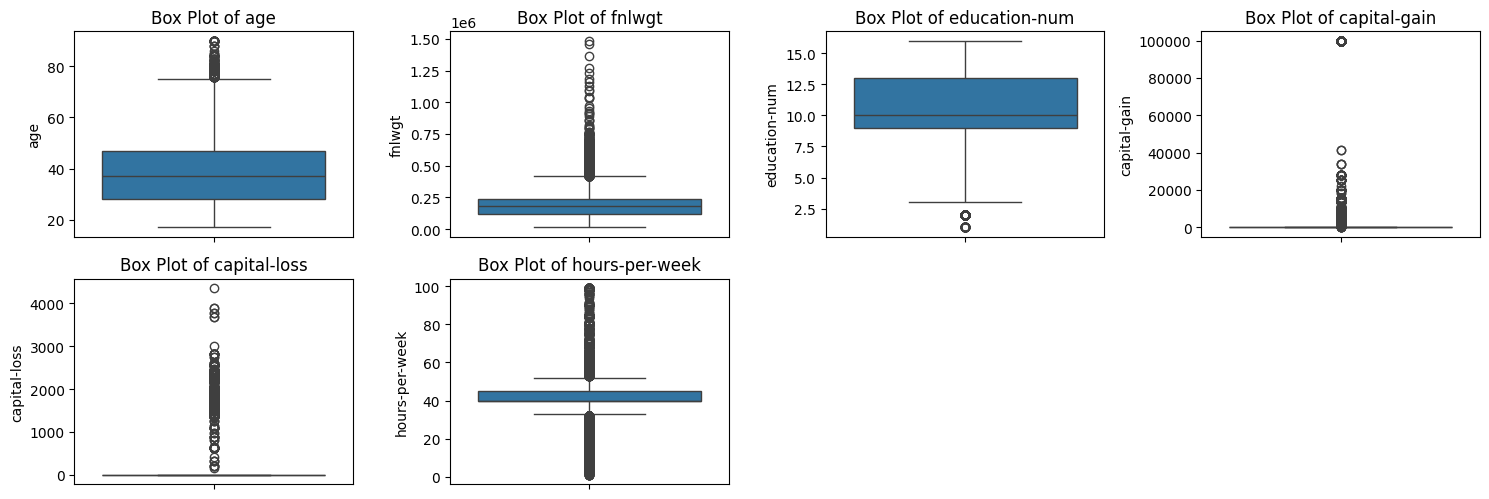

In [97]:
print(numerical_columns)
# Set the figure size
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  # Adjust subplot dimensions as needed
    sns.boxplot(y=df[column])  # Using df_filtered to show post-filtering data
    plt.title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

Original data shape: (30162, 15)
Filtered data shape: (18456, 15)


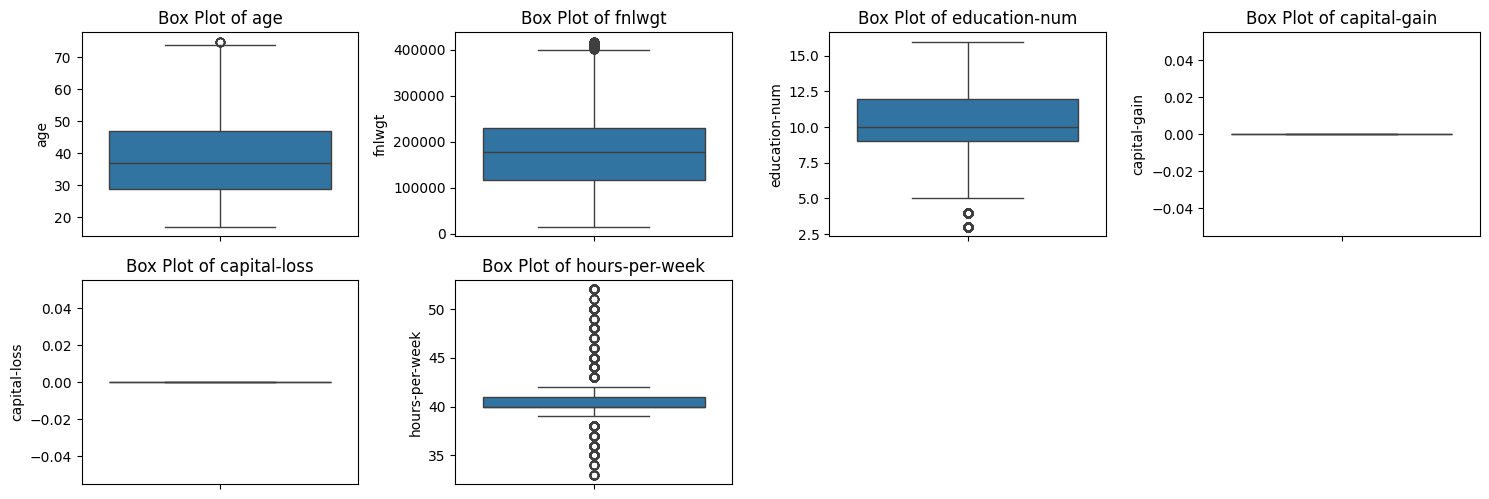

In [98]:

# Calculate IQR for numerical columns
Q1 = df[numerical_columns].quantile(0.25)  # 25th percentile
Q3 = df[numerical_columns].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Filtering the data to remove outliers
df_filtered = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {df.shape}')
print(f'Filtered data shape: {df_filtered.shape}')


# Set the figure size
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  # Adjust subplot dimensions as needed
    sns.boxplot(y=df_filtered[column])  # Using df_filtered to show post-filtering data
    plt.title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

### Feature Selection

In [100]:
# Define features (X) and target variable (y)
X = df_filtered.drop(columns=['income'])  # All columns except 'income'
y = df_filtered['income']  # Target variable: 'income'


### Heat Map

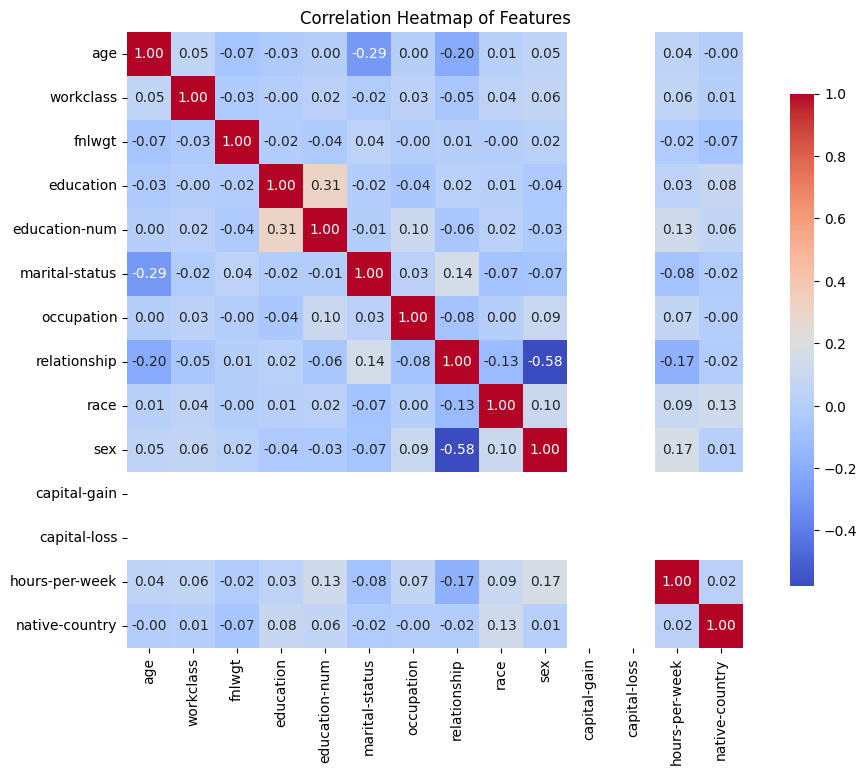

In [101]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()

### Spliting Dataset and Scaling Dataset

In [102]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Selection

In [103]:
# Creating and training the K-Nearest Neighbor (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default n_neighbors=5
knn_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

### Model Performance

Accuracy: 0.8163596966413867
Confusion Matrix:
 [[2638  296]
 [ 382  376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      2934
           1       0.56      0.50      0.53       758

    accuracy                           0.82      3692
   macro avg       0.72      0.70      0.71      3692
weighted avg       0.81      0.82      0.81      3692



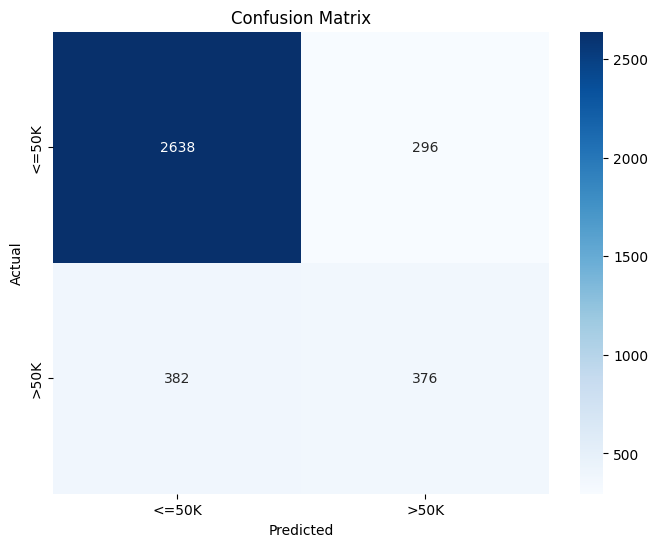

In [104]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
